In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import itertools
import numpy as np
import pandas as pd
pd.set_option('max_colwidth',100)

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import csv



In [2]:
def preprocessing(text):
#     text = text.decode("utf8")
    # tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]

    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]

    # remove words less than three letters
    tokens = [word for word in tokens if len(word) >= 3]

    # lower capitalization
    tokens = [word.lower() for word in tokens]

    # lemmatize
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    preprocessed_text= ' '.join(tokens)

    return preprocessed_text

In [3]:
def modelbuilding(sms_data,sms_labels):
    '''
    This is an example pipline to building a text classifier
    1. sampling
    2. TfidfVectorizer conversion
    3. building a naive_bayes model
    4. print the accuracy and other metrics
    5. print most relavent features 
    '''

    # sampling steps 
    trainset_size = int(round(len(sms_data)*0.70))
    # i chose this threshold for 70:30 train and test split.
    print( 'The training set size for this classifier is ' + str(trainset_size) + '\n')
    x_train = np.array([''.join(el) for el in sms_data[0:trainset_size]])
    y_train = np.array([el for el in sms_labels[0:trainset_size]])
    x_test = np.array([''.join(el) for el in sms_data[trainset_size+1:len(sms_data)]])
    y_test = np.array([el for el in sms_labels[trainset_size+1:len(sms_labels)]])
    print (x_train[1])
    print (y_train[1])

    # count vectorizer 
    # not really used just for explanation 
    from sklearn.feature_extraction.text import CountVectorizer
    sms_exp=[ ]
    for line in sms_data:
        sms_exp.append(line) #preprocessing(line[1])
    vectorizer = CountVectorizer(min_df=1)
    X_exp = vectorizer.fit_transform(sms_exp)
    print("||".join(vectorizer.get_feature_names()))
    print(X_exp.toarray()[1:5])

    # We are building a TFIDF vectorizer here
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),  stop_words='english',  strip_accents='unicode',  norm='l2')
    X_train = vectorizer.fit_transform(x_train)
    X_test = vectorizer.transform(x_test)

    from sklearn.naive_bayes import MultinomialNB
    clf = MultinomialNB().fit(X_train, y_train)
    y_nb_predicted = clf.predict(X_test)
    print(y_nb_predicted)
    print( ' \n confusion_matrix \n ')
    cm = confusion_matrix(y_test, y_pred)
    print (cm)
    print ('\n Here is the classification report:')
    print (classification_report(y_test, y_nb_predicted))
    # print the top features 

    coefs = clf.coef_
    intercept = clf.intercept_
    coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))
    n=10
    top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])
    for (coef_1, fn_1), (coef_2, fn_2) in top:
        print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1, fn_1, coef_2, fn_2))


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
sms = open('C:/Users/Devanshi/Downloads/smsspamcollection/SMSSpamCollection') # check the structure of this file!
sms_data = []
sms_labels = []
csv_reader = csv.reader(sms,delimiter='\t')

for line in csv_reader:
     # adding the sms_id 
    sms_labels.append( line[0])
    # adding the cleaned text We are calling preprocessing method 
    sms_data.append(preprocessing(line[1]))

sms.close()

# we are calling the model builing function here
# modelbuilding(sms_data, sms_labels)

In [6]:
# sampling steps 
trainset_size = int(round(len(sms_data)*0.70))
# i chose this threshold for 70:30 train and test split.
print( 'The training set size for this classifier is ' + str(trainset_size) + '\n')
x_train = np.array([''.join(el) for el in sms_data[0:trainset_size]])
y_train = np.array([el for el in sms_labels[0:trainset_size]])
x_test = np.array([''.join(el) for el in sms_data[trainset_size+1:len(sms_data)]])
y_test = np.array([el for el in sms_labels[trainset_size+1:len(sms_labels)]])
print (x_train)
print (y_train)

The training set size for this classifier is 3900

['jurong point crazy.. available bugis great world buffet ... cine got amore wat ...'
 'lar ... joking wif oni ...'
 'free entry wkly comp win cup final tkts 21st may 2005 text 87121 receive entry question std txt rate apply 08452810075over18'
 ...
 'tell call 09066358152 claim â£5000 prize enter mobile personal detail prompt careful'
 "thank you 've wonderful" 'otherwise part time job na-tuition..']
['ham' 'ham' 'spam' ... 'spam' 'ham' 'ham']


In [7]:
# count vectorizer 
# not really used just for explanation 

sms_exp=[ ]
for line in sms_data:
    sms_exp.append(line) #preprocessing(line[1])
vectorizer = CountVectorizer(min_df=1)
X_exp = vectorizer.fit_transform(sms_exp)

print("||".join(vectorizer.get_feature_names()[1:10]))
print('\n')
print(X_exp.toarray()[1:5])

000||000pes||008704050406||0089||0121||01223585236||01223585334||0125698789||02


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [8]:
# We are building a TFIDF vectorizer here

vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2),  
                             stop_words='english',  strip_accents='unicode',  norm='l2')

X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [9]:

clf = MultinomialNB().fit(X_train, y_train)
y_nb_predicted = clf.predict(X_test)
print(y_nb_predicted)

print( ' \n confusion_matrix \n ')
cm = confusion_matrix(y_test, y_nb_predicted)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_nb_predicted))


['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']
 
 confusion_matrix 
 
[[1443    0]
 [  52  176]]

 Here is the classification report:
             precision    recall  f1-score   support

        ham       0.97      1.00      0.98      1443
       spam       1.00      0.77      0.87       228

avg / total       0.97      0.97      0.97      1671



Confusion matrix, without normalization
[[1443    0]
 [  52  176]]
Normalized confusion matrix
[[1.   0.  ]
 [0.23 0.77]]


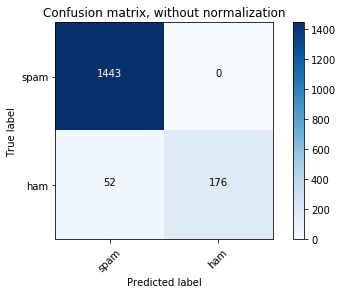

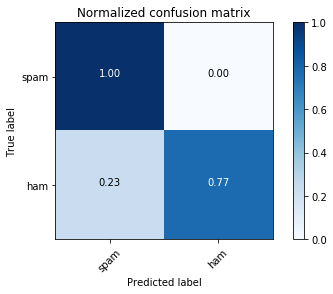

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_nb_predicted)
np.set_printoptions(precision=2)
class_names = list(set(y_train))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [22]:
# print the top features 
coefs = clf.coef_
intercept = clf.intercept_
feature_names = vectorizer.get_feature_names()
coefs_with_fns = sorted(zip(clf.coef_[0], feature_names))

n=20
top = zip(coefs_with_fns[:n], coefs_with_fns[:-(n + 1):-1])

for (coef_1, fn_1), (coef_2, fn_2) in top:
    print('\t%.4f\t%-15s\t\t%.4f\t%-15s' % (coef_1, fn_1, coef_2, fn_2))

	-9.0068	15             		-5.9369	free           
	-9.0068	1hr            		-6.1690	txt            
	-9.0068	1st lovely     		-6.2640	text           
	-9.0068	2go            		-6.3722	claim          
	-9.0068	2morrow        		-6.4473	stop           
	-9.0068	2mrw           		-6.4558	mobile         
	-9.0068	2nd inning     		-6.5161	reply          
	-9.0068	2nd sm         		-6.5283	prize          
	-9.0068	30             		-6.5454	service        
	-9.0068	30 want        		-6.5853	tone           
	-9.0068	30ish          		-6.6168	www            
	-9.0068	3rd            		-6.7365	150p           
	-9.0068	3rd nature     		-6.7419	new            
	-9.0068	48             		-6.8009	msg            
	-9.0068	4get           		-6.8027	urgent         
	-9.0068	4th            		-6.8078	cash           
	-9.0068	4th personality		-6.8445	nokia          
	-9.0068	530            		-6.8912	win            
	-9.0068	5min           		-6.9026	uk             
	-9.0068	5pm            		-6.9267	week           


## Pandas DF

In [37]:
df = pd.read_csv('C:/Users/Devanshi/Downloads/smsspamcollection/SMSSpamCollection.csv', encoding="ISO-8859-1", names=['sms_labels','sms_data'])
df.head()

,sms_labels,sms_data
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [ ]:
df.